In [1]:
%config IPCompleter.greedy=True
import os
import pygal
import numpy as np
import pandas as pd
import cairosvg
import datetime
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import chisquare

In [2]:
path_datos = "/home/lalo/Documentos/Diplomado Ciencia de Datos/Modulo 1/Calidad de Datos (Primera Parte)/Datos/"

tabla = pd.read_csv(path_datos + "OnlineNewsPopularity.csv")
test = pd.read_csv(path_datos + "test.csv")
train = pd.read_csv(path_datos + "train.csv")
val = pd.read_csv(path_datos + "val.csv")


In [3]:
# Para saber cuantas variables y registros tiene
tabla.shape

(39644, 61)

In [4]:
# Para saber el nombre de las variables de la tabla
tabla.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [8]:
# Se notan que tiene vacìos, habrà que quitarlos

tabla.columns =[x.strip() for x in tabla.columns]
# traducciòn del bucle: para cada x qut toma el nombre de cada una de las columnas en la tabla
# x.strip() le quita los vacios de los extremos a la variable x
tabla.columns


Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Diferenciar que tipo de variable es: Continua o discreta

In [9]:
# 1ª Forma, se saca que  de datos es la variable. Generalmente, se agrupan de la siguiente manera: 
# Continuas: Double, Long, Date
# Discretas: String, Char, Integer, Date, booleanas (Binaria)
tabla["shares"].describe
# Se nota que tiene un buen de valores, por lo que no se puede categorizar y aunque sea de tipo integer
# por el tipo de valores, es continua

<bound method NDFrame.describe of 0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name: shares, Length: 39644, dtype: int64>

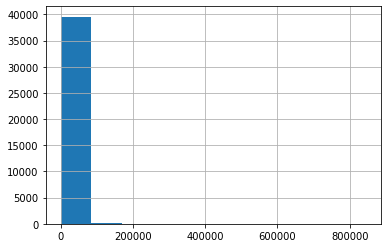

In [10]:
# Validaciòn de la distribuciones de las variables continuas
# Si tomamos la variable share y su histograma y estadisticas
tabla["shares"].hist()


In [12]:
# Vemos que la gran mayorìa de los valores se concentran, asì que hay que ver sus estadisticas
tabla["shares"].describe(percentiles = [x/10 for x in range(10)] + [0.01, 0.05, 0.95, 0.99])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
0%            1.000000
1%          381.000000
5%          584.000000
10%         708.000000
20%         870.600000
30%        1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
80%        3400.000000
90%        6200.000000
95%       10800.000000
99%       31657.000000
max      843300.000000
Name: shares, dtype: float64

In [13]:
# Agarramos el rango (1%, 99%) para la nueva tabla y sobreescribimos
tabla = tabla[(tabla["shares"] <= 31657) & (tabla["shares"] >= 381)]

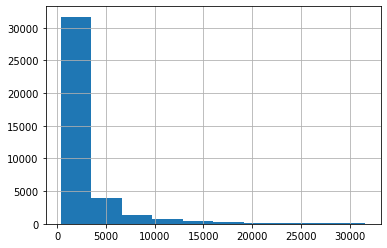

In [14]:
tabla["shares"].hist()

In [15]:
tabla["shares"].describe(percentiles = [x/10 for x in range(10)] + [0.01, 0.05, 0.95, 0.99])

count    38853.000000
mean      2707.845778
std       3656.936106
min        381.000000
0%         381.000000
1%         462.000000
5%         610.000000
10%        722.000000
20%        879.000000
30%       1000.000000
40%       1200.000000
50%       1400.000000
60%       1800.000000
70%       2300.000000
80%       3300.000000
90%       5800.000000
95%       9500.000000
99%      20600.000000
max      31600.000000
Name: shares, dtype: float64

In [12]:
# veamos como se distribuye èsta variable con la distribuciòn binomial
np.histogram(tabla["shares"])
# Nos arroja dos arrays con los puntos donde corta cada barra del histograma,
# por lo que podemos meter dos variables que almacenen cada array

(array([31694,  3930,  1348,   723,   381,   303,   176,   141,    96,
           61]),
 array([  381. ,  3502.9,  6624.8,  9746.7, 12868.6, 15990.5, 19112.4,
        22234.3, 25356.2, 28478.1, 31600. ]))

In [13]:
freq, bins = np.histogram(tabla["shares"])

In [14]:
# eje de las y's
freq

array([31694,  3930,  1348,   723,   381,   303,   176,   141,    96,
          61])

In [15]:
# eje de las x's
bins

array([  381. ,  3502.9,  6624.8,  9746.7, 12868.6, 15990.5, 19112.4,
       22234.3, 25356.2, 28478.1, 31600. ])

In [16]:
# Hay que hacer la gràfica màs bonita y que se vea donde se concentra la poblaciòn
hist = list(zip(freq, bins, bins[1:]))
# con zip se hacen pares ordenados con freq como el eje de las x's y 
# y bins serà para el eje de las y's
# 
hist_plot = pygal.Histogram()

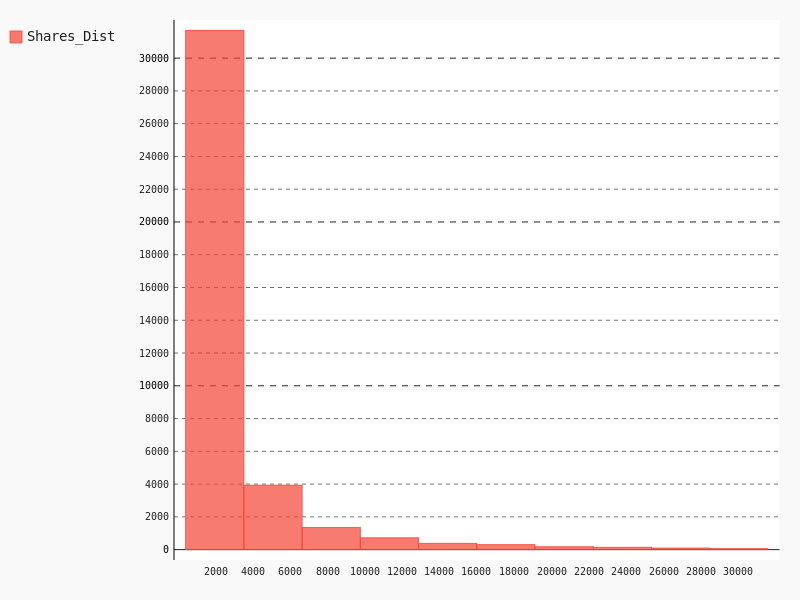

In [17]:
hist_plot.add("Shares_Dist", hist)

In [66]:
# hay que validar si la informaciòn es Dist normal, hay que utilizar test's
# test = pd.read_csv("/home/lalo/Documentos/Diplomado Ciencia de Datos/Practica 1/test.csv")
# train = pd.read_csv("/home/lalo/Documentos/Diplomado Ciencia de Datos/Practica 1/train.csv")
# val = pd.read_csv("/home/lalo/Documentos/Diplomado Ciencia de Datos/Practica 1/val.csv")


In [18]:
# Pero hay que ser pràcticos, no se va ejecutar linea por lìnea, hay que crear una funciòn que 
# el paràmetro sea la variable de una tabla en especifico
def plot_histogram(data,var):
    ye_s, equis = np.histogram(data[var])
    hist = list(zip(ye_s, equis, equis[1:]))
    hist_plot = pygal.Histogram()
    hist_plot.add("Dist_" + var, hist)
    return hist_plot
    # hist_plot.render_to_png("/home/lalo/Documentos/Diplomado Ciencia de Datos/Practica 1")

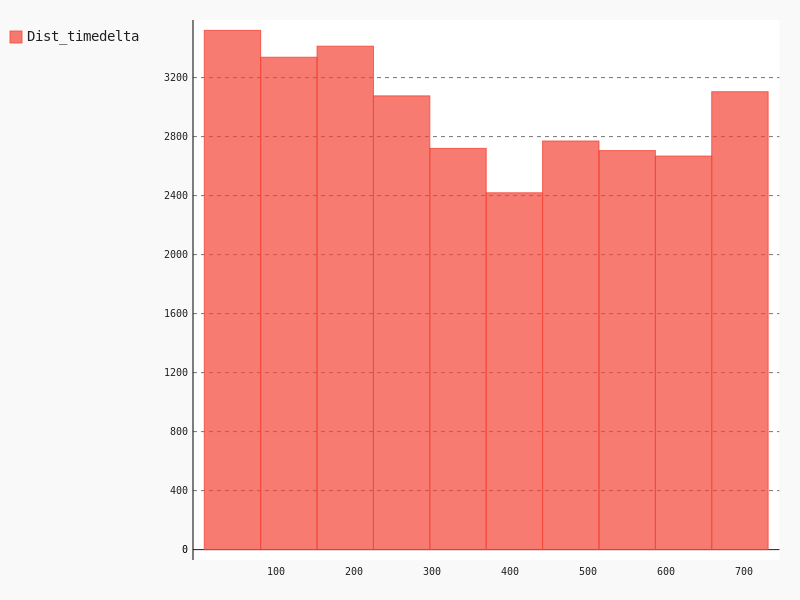

In [19]:
plot_histogram(train,"timedelta")

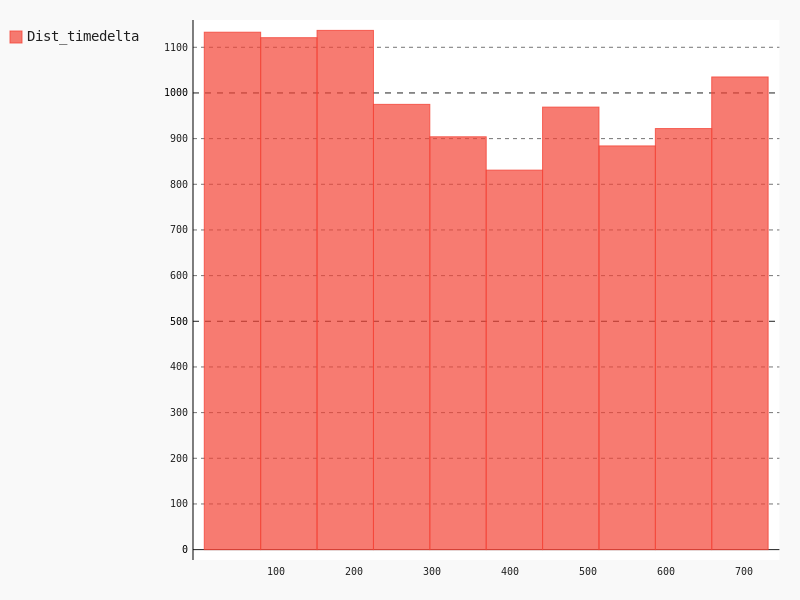

In [20]:
plot_histogram(test,"timedelta")

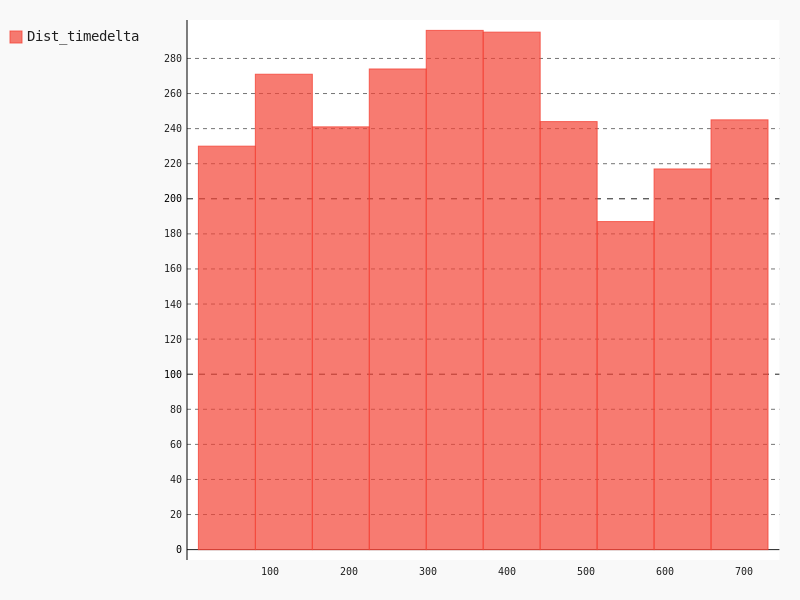

In [21]:
plot_histogram(val,"timedelta")

In [22]:
# tal vez se vean distintas, pero hay que comparar sus medias E(x)
# Solo es para variables continuas
ks_2samp(train["shares"], test["shares"])
# La H0 es que las muestras tienen la misma distribuciòn y misma media
# Si el pvalue < 5% se acepta la H0 y se rechaza la H alternativa, esto es error del tipo 1

Ks_2sampResult(statistic=0.008609961995089649, pvalue=0.6401088371171999)

In [23]:
ks_2samp(train["shares"], val["shares"])

Ks_2sampResult(statistic=0.936501530286214, pvalue=0.0)

In [24]:
ls_cont = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
           'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
           'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
           'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
           'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
           'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
           'abs_title_subjectivity', 'abs_title_sentiment_polarity']
ls_disc = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday',
           'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
           'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

## Variables Continuas 


In [25]:
[var_cont for var_cont in ls_cont]

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [26]:
# La funciòn se ha modificado para guardar las imagenes en una ruta especifica
def plot_histogram(data,var):
    path_img_hist = "/home/lalo/Documentos/Diplomado Ciencia de Datos/Modulo 1/Calidad de Datos (Primera Parte)/Histogramas/"
    ye_s, equis = np.histogram(data[var])
    hist = list(zip(ye_s, equis, equis[1:]))
    hist_plot = pygal.Histogram()
    hist_plot.add(var + "_dist", hist)
    hist_plot.render_to_png(path_img_hist + var)

In [27]:
# Bucle para cada variable continua y guarda cada gràfica
for var_cont in ls_cont:
   [plot_histogram(train,var_cont)]


In [28]:
# Si el pvalue es > 5% se concluye que no es una distribuciòn normal
ks_2samp(train["shares"], test["shares"])
# Para el caso de shares, las poblaciones no siguen una distribuciòn normal
# Pero shares es una variable discreta

Ks_2sampResult(statistic=0.008609961995089649, pvalue=0.6401088371171999)

In [29]:
# Hay que hacerlo para todas las variables continuas
# entonces hay que hacer la funciòn
def ks_var_continuas(data_1,data_2,var):
    stadistic_a, p_value_a = ks_2samp(data_1[var], data_2[var])
    # return var, stadistic_a, p_value_a
    return p_value_a


In [37]:
ks_var_continuas(train,test,"shares")

0.6401088371171999

In [39]:
# Bucle para meter las variables continuas en un conjunto de arrays
Cat_var_cont = {}
for var_cont in ls_cont:
    Cat_var_cont[var_cont] = []

Cat_var_cont

{'timedelta': [],
 'n_tokens_title': [],
 'n_tokens_content': [],
 'n_unique_tokens': [],
 'n_non_stop_words': [],
 'n_non_stop_unique_tokens': [],
 'num_hrefs': [],
 'num_self_hrefs': [],
 'num_imgs': [],
 'num_videos': [],
 'average_token_length': [],
 'num_keywords': [],
 'kw_min_min': [],
 'kw_max_min': [],
 'kw_avg_min': [],
 'kw_min_max': [],
 'kw_max_max': [],
 'kw_avg_max': [],
 'kw_min_avg': [],
 'kw_max_avg': [],
 'kw_avg_avg': [],
 'self_reference_min_shares': [],
 'self_reference_max_shares': [],
 'self_reference_avg_sharess': [],
 'LDA_00': [],
 'LDA_01': [],
 'LDA_02': [],
 'LDA_03': [],
 'LDA_04': [],
 'global_subjectivity': [],
 'global_sentiment_polarity': [],
 'global_rate_positive_words': [],
 'global_rate_negative_words': [],
 'rate_positive_words': [],
 'rate_negative_words': [],
 'avg_positive_polarity': [],
 'min_positive_polarity': [],
 'max_positive_polarity': [],
 'avg_negative_polarity': [],
 'min_negative_polarity': [],
 'max_negative_polarity': [],
 'title_

In [40]:
# mismo bucle, pero ahora meto el p_value
Cat_var_cont = {}
for var_cont in ls_cont:
    Cat_var_cont[var_cont] = [ks_var_continuas(train,test,var_cont)]
    

Cat_var_cont

{'timedelta': [0.336909980246578],
 'n_tokens_title': [0.9999917311429612],
 'n_tokens_content': [0.6596717010834507],
 'n_unique_tokens': [0.9985578939160501],
 'n_non_stop_words': [0.5962721543674587],
 'n_non_stop_unique_tokens': [0.9383747286935015],
 'num_hrefs': [0.943387572069084],
 'num_self_hrefs': [0.5530946154756445],
 'num_imgs': [0.5483571519489848],
 'num_videos': [0.9609635599473173],
 'average_token_length': [0.20743280590132415],
 'num_keywords': [0.9999997218359787],
 'kw_min_min': [0.9189085979077903],
 'kw_max_min': [0.9458012963199981],
 'kw_avg_min': [0.7699742921381074],
 'kw_min_max': [0.899925941438003],
 'kw_max_max': [0.9999999419732464],
 'kw_avg_max': [0.6889585722324871],
 'kw_min_avg': [0.3442198273335508],
 'kw_max_avg': [0.630335394604324],
 'kw_avg_avg': [0.8016550715977406],
 'self_reference_min_shares': [0.9569404447047432],
 'self_reference_max_shares': [0.9999656507203138],
 'self_reference_avg_sharess': [0.9900728724614877],
 'LDA_00': [0.70352578

In [43]:
# mismo bucle, pero ahora filtro por un auxiliar que toma el valor de p-value y es menor a .05
Cat_var_cont = {}
for var_cont in ls_cont:
    aux = ks_var_continuas(train,test,var_cont)
    if aux <= .05: Cat_var_cont[var_cont] = [aux]
        

Cat_var_cont

{'avg_positive_polarity': [0.034133144579349364]}

In [44]:
# Validaciòn del bucle
Cat_var_cont = {}
for var_cont in ls_cont:
    aux = ks_var_continuas(train,test,var_cont)
    if aux <= .45: Cat_var_cont[var_cont] = [aux]
        

Cat_var_cont

{'timedelta': [0.336909980246578],
 'average_token_length': [0.20743280590132415],
 'kw_min_avg': [0.3442198273335508],
 'LDA_01': [0.32614138615032817],
 'global_sentiment_polarity': [0.14693719263547866],
 'global_rate_positive_words': [0.444146370479896],
 'avg_positive_polarity': [0.034133144579349364],
 'max_positive_polarity': [0.4484562319568283]}

## Variables Discretas

In [50]:
# frecuencias de la variable, ya que es binaria
tabla["is_weekend"].value_counts()

0.0    33751
1.0     5102
Name: is_weekend, dtype: int64

In [67]:
data_1 = tabla["is_weekend"].value_counts()
data_1.head(5)

0.0    33751
1.0     5102
Name: is_weekend, dtype: int64

In [62]:
Cat_var_dis = {}
for var_dis in ls_disc:
    Cat_var_dis[var_dis] = []

Cat_var_dis


{'data_channel_is_lifestyle': [],
 'data_channel_is_entertainment': [],
 'data_channel_is_bus': [],
 'data_channel_is_socmed': [],
 'data_channel_is_tech': [],
 'data_channel_is_world': [],
 'weekday_is_monday': [],
 'weekday_is_tuesday': [],
 'weekday_is_wednesday': [],
 'weekday_is_thursday': [],
 'weekday_is_friday': [],
 'weekday_is_saturday': [],
 'weekday_is_sunday': [],
 'is_weekend': []}

In [63]:
Cat_var_dis = {}
for var_dis in ls_disc:
    Cat_var_dis[var_dis] = [tabla[var_dis].value_counts()]

Cat_var_dis


{'data_channel_is_lifestyle': [0.0    36803
  1.0     2050
  Name: data_channel_is_lifestyle, dtype: int64],
 'data_channel_is_entertainment': [0.0    31937
  1.0     6916
  Name: data_channel_is_entertainment, dtype: int64],
 'data_channel_is_bus': [0.0    32683
  1.0     6170
  Name: data_channel_is_bus, dtype: int64],
 'data_channel_is_socmed': [0.0    36565
  1.0     2288
  Name: data_channel_is_socmed, dtype: int64],
 'data_channel_is_tech': [0.0    31592
  1.0     7261
  Name: data_channel_is_tech, dtype: int64],
 'data_channel_is_world': [0.0    30615
  1.0     8238
  Name: data_channel_is_world, dtype: int64],
 'weekday_is_monday': [0.0    32335
  1.0     6518
  Name: weekday_is_monday, dtype: int64],
 'weekday_is_tuesday': [0.0    31608
  1.0     7245
  Name: weekday_is_tuesday, dtype: int64],
 'weekday_is_wednesday': [0.0    31570
  1.0     7283
  Name: weekday_is_wednesday, dtype: int64],
 'weekday_is_thursday': [0.0    31728
  1.0     7125
  Name: weekday_is_thursday, dtype

In [65]:
cat_algo[],cat_algo2[]  =tabla[var_dis].value_counts()

SyntaxError: invalid syntax (<ipython-input-65-4978f0667f1e>, line 1)